In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

dataSet = pd.read_csv("Carros_Usados_Dataset - Used Car Dataset.csv")
print(dataSet.head())



                                              modelo año_registro  \
0                    2017 Mercedes-Benz S-Class S400       jul-17   
1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI       Jan-21   
2                       2018 BMW X1 sDrive 20d xLine       Sep-18   
3                           2019 Kia Seltos GTX Plus       Dec-19   
4                    2019 Skoda Superb LK 1.8 TSI AT       Aug-19   

   km_recorridos  kilometraje(kmpl)  caballos_fuerza  precio_dolares(miles)  
0          56000               7.81              394                  63.75  
1          30615              17.40              118                   8.99  
2          24000              20.68              144                  23.75  
3          18378              16.50              367                  13.56  
4          44900              14.67              141                  24.00  


In [42]:
print(dataSet.describe())

       km_recorridos  kilometraje(kmpl)  caballos_fuerza  \
count     500.000000         500.000000       500.000000   
mean    48145.280000          17.086682       246.396000   
std     26916.506686           4.070672        86.890247   
min       620.000000           7.810000       100.000000   
25%     30000.000000          14.207500       172.750000   
50%     46926.500000          17.800000       246.000000   
75%     64000.000000          19.950000       320.000000   
max    154000.000000          29.960000       400.000000   

       precio_dolares(miles)  
count             500.000000  
mean               17.288800  
std                18.409635  
min                 1.090000  
25%                 5.422500  
50%                 9.250000  
75%                22.500000  
max                98.500000  


## Pasar a arreglos de NumPy

In [43]:
''' arr_mod probablemente no se va a usar
arr_mod = dataSet['modelo'].to_numpy() '''

arr_reg = dataSet['año_registro'].to_numpy()
arr_kmrec = dataSet['km_recorridos'].to_numpy()
arr_klmt = dataSet['kilometraje(kmpl)'].to_numpy() 
arr_cdf = dataSet['caballos_fuerza'].to_numpy() 


arr_price = dataSet['precio_dolares(miles)'].to_numpy()

# Correccion de el tipo de dato de año

In [44]:
for i in range(len(arr_reg)):
    if len(arr_reg[i]) == 4 :
        pass
    else:
        arr_reg[i] = '20'+ arr_reg[i][4:6] 

arr_reg = arr_reg.astype(int)

type(arr_reg[0])

numpy.int64

## analizamos los datos
para encontrar anomalias o ver relaciones

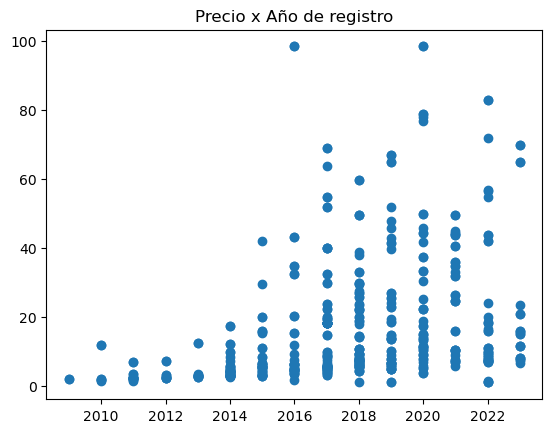

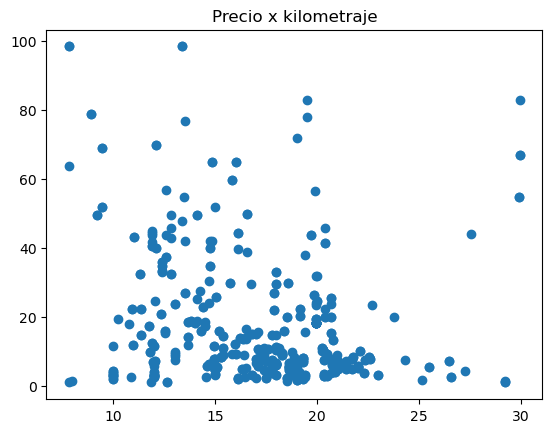

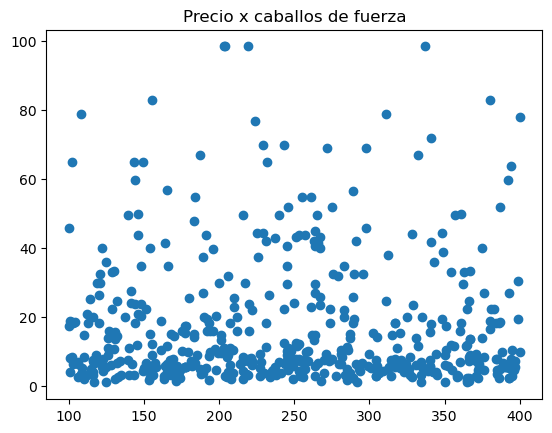

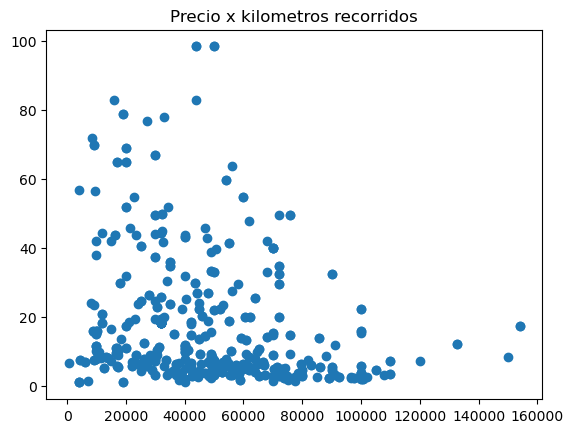

In [48]:
plt.scatter(arr_reg,arr_price)
plt.title("Precio x Año de registro")
plt.show()

plt.scatter(arr_klmt,arr_price)
plt.title("Precio x kilometraje")
plt.show()

plt.scatter(arr_cdf,arr_price)
plt.title("Precio x caballos de fuerza")
plt.show()

plt.scatter(arr_kmrec,arr_price)
plt.title("Precio x kilometros recorridos")
plt.show()



#### posible error en los datos  
Ford Figo 2011 vale 70,000 miles de dolares   
Hyunday Grand Magna tiene un kmtraje de 119.7   
Mercedes-Benz A-Class Limousine iene un kmtraje 147.51   

se corrigieron cambiandolos por 7 , 11.97 y 14.751 espectivamente, que son datos mas concistentes 

#### Todas estas features muestran una relacion distinta con respecto al precio de los autos, por lo que no podriamos generar una prediccion o la elaboracion del modelo ignorando alguna de estas, tambien es importante tomar en cuenta que los precios tienen una distribucion muy extraña asi que es imposible sacar de alguna de estas una prediccion por cosas como que en el año 2019 hay mas de 30 precios distinos, por lo tanto no contamos tampoco con una relacion certera entre cada uno de los datos, asi que la opcion mas viable ya que tenemos R4 -> R1 es crear un modelo de regresion lineal multivariable para asi no perder nada de informacion

In [56]:
''' generamos el modelo '''

modelo = LinearRegression()

''' acomodamos los datos'''

datos_entrada = pd.DataFrame({
    'año_registro': arr_reg,
    'km_recorridos': arr_kmrec,
    'kilometraje(kmpl)': arr_klmt,
    'caballos_fuerza': arr_cdf
})

salidas = dataSet['precio_dolares(miles)']

''' entrenamos el modelo con estos datos'''
modelo.fit(datos_entrada,salidas)

print("Coeficientes:")
for feature, coef in zip(datos_entrada.columns, modelo.coef_):
    print(f"  {feature}: {coef:.2f}")

Coeficientes:
  año_registro: 2.21
  km_recorridos: -0.00
  kilometraje(kmpl): -1.28
  caballos_fuerza: 0.00
